In [1]:
from sdv.tabular import CopulaGAN, GaussianCopula, CTGAN # Synthetic data
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time

For all the experiments, we use Gaussian copula to take those data into account and generate synthetic data, and we see the correlation betweeen the synthetic $x$ and $y$. We all take 1000 "real" data and generate 500 synthetic data.

We will first test a correlation between two columns. We first generate a data with three rows: $x$, $$y, and false_target. the row of $y$ is twice of row $x$ with standard Gaussian noise.

# Linear Correlation of Two Rows

In [2]:
x=np.random.rand(1000)*50

In [3]:
y=x*2+np.random.randn(1000)

Text(0, 0.5, 'artificial y=2x')

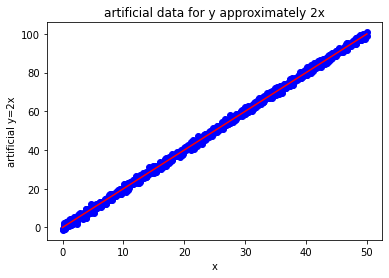

In [4]:
plt.plot(x,y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("artificial data for y approximately 2x")
plt.xlabel("x")
plt.ylabel("artificial y=2x")

In [5]:
false_target=np.random.rand(1000)*10 # a independent additional "target"  column

Text(0.5, 1.0, 'artificial data for x and false_target')

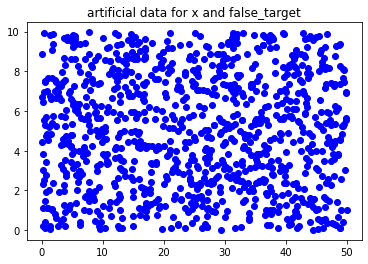

In [6]:
plt.plot(x,false_target,"bo")
plt.title("artificial data for x and false_target")

The false_target does not have any correlation of $x$

In [7]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])

In [8]:
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


In [9]:
synthetic_x=sample["x"]
synthetic_y=sample["y"]

Text(0, 0.5, 'synthetic y=2x')

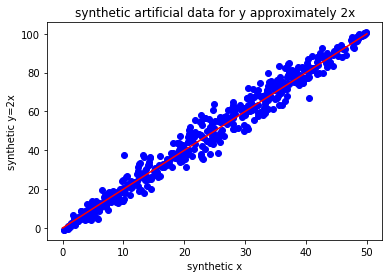

In [10]:
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

In [11]:
MSE = ((synthetic_y-2*synthetic_x)**2).mean() #The mean square error

In [12]:
MSE

19.121838095591777

Comparing to magnitude 50, it is not that large

In [13]:
synthetic_false_target=sample["false_target"]

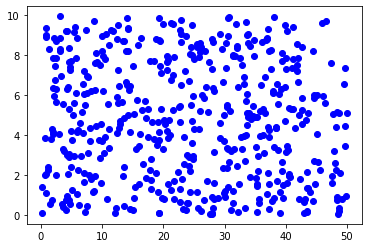

In [14]:
plt.plot(synthetic_x,synthetic_false_target,"bo")

From the graphs we can conclude that it captures somewhat the linear correlation between the columns if they have correlation. 

Now we dive into non-linear correlation.

# Non-linear Correlation of Two Rows
Now we're going to generalize the data of $y=x^2+\varepsilon$ where $x\sim U[-5,5]$ and $\varepsilon \sim \mathcal{N}(0,1)$.

Text(0, 0.5, 'artificial y=x^2')

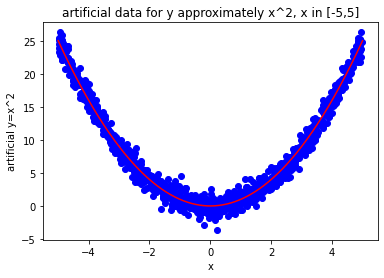

In [15]:
x=np.random.rand(1000)*10-5
y=x**2+np.random.randn(1000)
false_target=np.random.rand(1000)*10
real_x = np.linspace(-5,5,1000)  
real_y = real_x*real_x
plt.plot(x,y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("artificial data for y approximately x^2, x in [-5,5]")
plt.xlabel("x")
plt.ylabel("artificial y=x^2")

Then we generate the synthetic data to check whether it capture this relation.

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Text(0, 0.5, 'synthetic y=x^2')

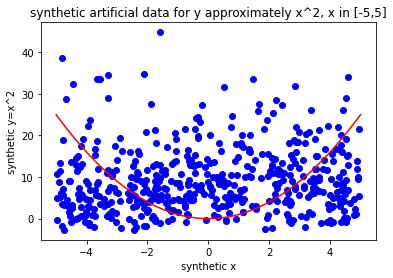

In [16]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("synthetic artificial data for y approximately x^2, x in [-5,5]")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=x^2")

Notice that for quadratic correlation it will not capture the correlation and will not genarate the data along the line of $y=x^2$. 

But we have another guessing: it only captures the the "slope" for the data but looks like linear. So we will generate another example to check this.

Text(0, 0.5, 'artificial y=x^2')

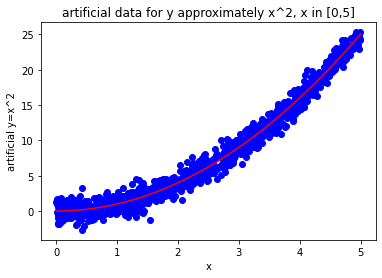

In [17]:
x=np.random.rand(1000)*5
y=x**2+np.random.randn(1000)
false_target=np.random.rand(1000)*10
real_x = np.linspace(0,5,1000)  
real_y = real_x*real_x
plt.plot(x,y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("artificial data for y approximately x^2, x in [0,5]")
plt.xlabel("x")
plt.ylabel("artificial y=x^2")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Text(0, 0.5, 'synthetic y=x^2')

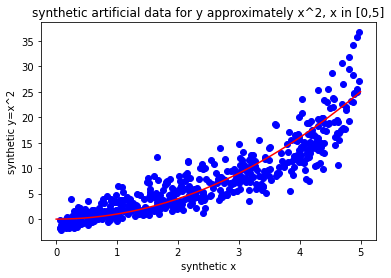

In [18]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("synthetic artificial data for y approximately x^2, x in [0,5]")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=x^2")

We can see the synthetic $y$ gets larger when $x$ gets larger. However, the growth still looks like linear and does not fit the line. From the previous graph it is not clear to see, we use another example of cubic function $y=x^3-12x$ below to illustrate this. 

Text(0, 0.5, 'artificial y=x^3-12x')

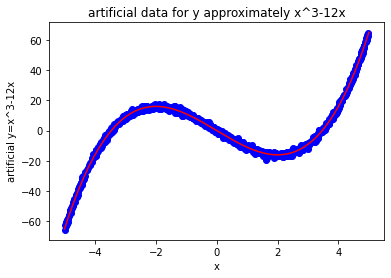

In [19]:
x=np.random.rand(1000)*10-5
y=x**3-12*x+np.random.randn(1000)
false_target=np.random.rand(1000)*10
real_x = np.linspace(-5,5,1000)  
real_y = real_x**3-12*real_x
plt.plot(x,y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("artificial data for y approximately x^3-12x")
plt.xlabel("x")
plt.ylabel("artificial y=x^3-12x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Text(0, 0.5, 'synthetic y=x^3-12x')

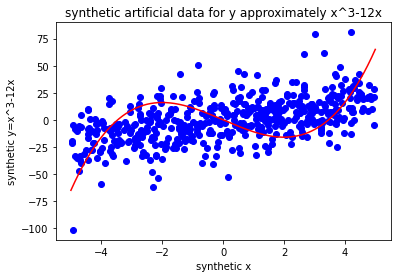

In [20]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("synthetic artificial data for y approximately x^3-12x")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=x^3-12x")

From the figures above, we can conclude that tt seems that they generate the data along a line.

# Linear Correlations for Multiple (4) rows

Text(0, 0.5, 'artificial y')

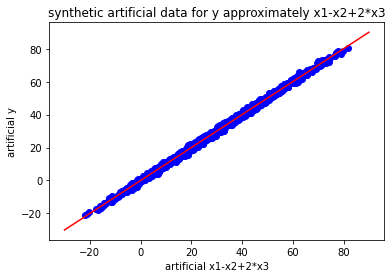

In [21]:
x1=np.random.rand(1000)*30
x2=np.random.rand(1000)*30
x3=np.random.rand(1000)*30
feature_x=x1-x2+2*x3
y=x1-x2+2*x3+np.random.randn(1000)
plt.plot(feature_x,y,"bo")
false_target=np.random.rand(1000)*10
a=[-30,90]; b=[-30,90]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately x1-x2+2*x3")
plt.xlabel("artificial x1-x2+2*x3")
plt.ylabel("artificial y")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Text(0, 0.5, 'synthetic y')

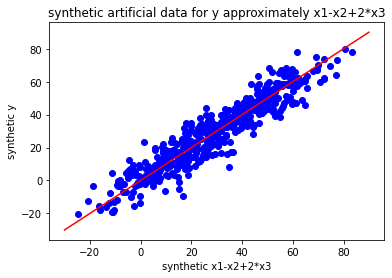

In [22]:
df=pd.DataFrame(pd.DataFrame([x1,x2,x3,y,false_target]).values.T,columns = ["x1","x2","x3","y","false_target"])
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
synthetic_feature_x=sample["x1"]-sample["x2"]+2*sample["x3"]
synthetic_y=sample["y"]
plt.plot(synthetic_feature_x,synthetic_y,"bo")
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately x1-x2+2*x3")
plt.xlabel("synthetic x1-x2+2*x3")
plt.ylabel("synthetic y")

In [23]:
MSE = ((synthetic_y-synthetic_feature_x)**2).mean() #The mean square error
MSE

53.85738959923752

We can see that it captures the correlation, but the variance is larger.

# Use Other Models of 2 Cols

Text(0, 0.5, 'artificial y=2x')

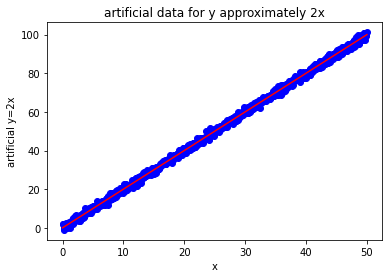

In [24]:
x=np.random.rand(1000)*50
y=x*2+np.random.randn(1000)
plt.plot(x,y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("artificial data for y approximately 2x")
plt.xlabel("x")
plt.ylabel("artificial y=2x")

In [25]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (i

Using CopulaGAN uses 41.61984944343567 seconds.


Text(0, 0.5, 'synthetic y=2x')

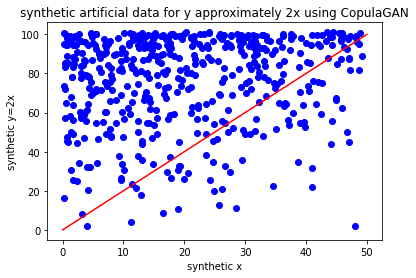

In [26]:
ST=time.time()
model = CopulaGAN()
model.fit(df)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CopulaGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using CopulaGAN")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\u

Using CTGAN uses 41.92936372756958 seconds.


Text(0, 0.5, 'synthetic y=2x')

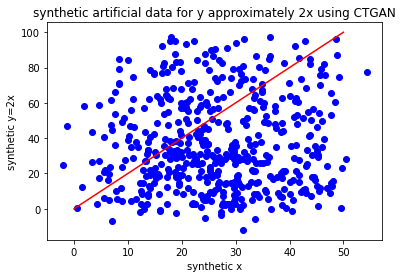

In [27]:
ST=time.time()
model = CTGAN()
model.fit(df)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CTGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using CTGAN")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Using GaussianCopula uses 1.2818934917449951 seconds.


Text(0, 0.5, 'synthetic y=2x')

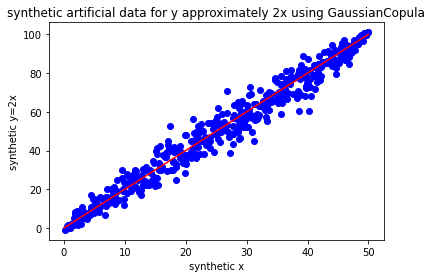

In [28]:
ST=time.time()
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using GaussianCopula uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using GaussianCopula")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

We can see only the GaussianCopula captures the correlation.

# Conclusion
We have several conclusions:
1. Only LINEAR correlations can be detected.
2. We can detect the correct correlations between several columns
3. Only using GaussianCopula we can do the work, but other models seems not.

We have the following guessings:
1. It only generate along the linear model.
2. It may preserve the variances, covariances
3. It may generate the data from a gaussian distribution.